In [46]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types , cut_dfs_generic_Vpi0eta

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# DRAW with respect to generic bkg

In [4]:
base_file_loc = '/media/jykim/T7/storage/01_recon/massveto_calib_0614_calib_skim/'


phigamma_ccbar = base_file_loc + 'ccbar/recon_*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_*.root'
phigamma_charged = base_file_loc + 'charged/recon_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_*.root'

In [12]:
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.68 && D0_M<2.05'

variables=['D0_M','D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','Dstarp_flightDistance','Dstarp_flightDistanceErr','D0_flightDistance','D0_flightDistanceErr','Dstarp_chiProb']
variables += ['dM_pi0_50MeV', 'dM_pi0_75MeV']

tree='kshort'

In [13]:
pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [21]:
pd_ccbar = pd_phigamma_ccbar.reset_index(drop=True)
pd_uubar = pd_phigamma_uubar.reset_index(drop=True)
pd_ddbar = pd_phigamma_ddbar.reset_index(drop=True)
pd_ssbar = pd_phigamma_ssbar.reset_index(drop=True)
pd_charged = pd_phigamma_charged.reset_index(drop=True)
pd_mixed = pd_phigamma_mixed.reset_index(drop=True)
pd_taupair = pd_phigamma_taupair.reset_index(drop=True)

[ 701.  777.  748.  867.  828.  863.  854.  934.  948. 1000. 1023. 1032.
 1064. 1097. 1220. 1463. 1626. 1963. 2308. 2772. 3064. 3179. 3003. 2535.
 1982. 1202.  723.  423.  267.  211.  216.  154.  171.  164.  148.  162.
  153.  165.  142.  131.  140.  124.  126.  136.  111.  123.  140.  133.
  132.  125.]
fitst_bin_entries=701.0


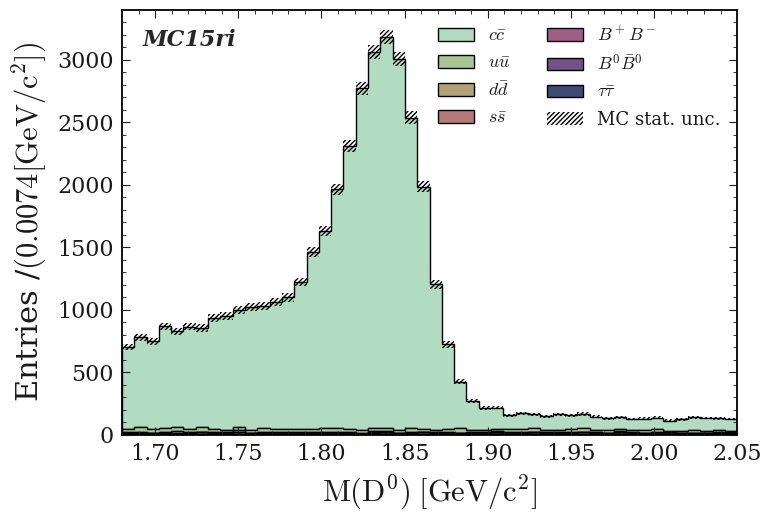

In [62]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]")

In [23]:
cut = 'gamma_E>0.0'
cut = 'dM_pi0_75MeV  > 0.023'

# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001  '
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[ 701.  777.  748.  867.  828.  863.  854.  934.  948. 1000. 1023. 1032.
 1064. 1097. 1220. 1463. 1626. 1963. 2308. 2772. 3064. 3179. 3003. 2535.
 1982. 1202.  723.  423.  267.  211.  216.  154.  171.  164.  148.  162.
  153.  165.  142.  131.  140.  124.  126.  136.  111.  123.  140.  133.
  132.  125.]
fitst_bin_entries=701.0


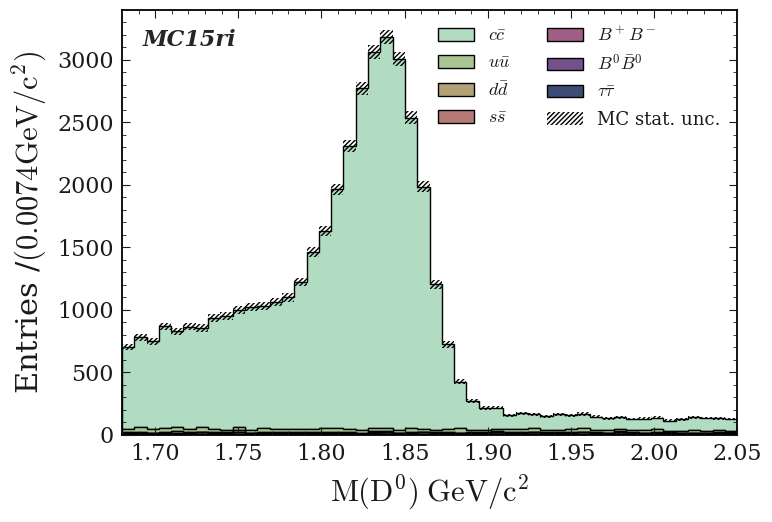

In [26]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]")

# DRAW with respect to TopoAna

In [29]:
base_file_loc = '/media/jykim/T7/storage/01_recon/massveto_calib_0614_calib_skim/'


# phigamma_ccbar = base_file_loc + 'ccbar/recon_*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
phigamma_ccbar = base_file_loc + 'topo/resultfile/result_kshort/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_*.root'
phigamma_charged = base_file_loc + 'charged/recon_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_*.root'

In [38]:
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.68 && D0_M<2.05'

variables=['D0_M','D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','Dstarp_flightDistance','Dstarp_flightDistanceErr','D0_flightDistance','D0_flightDistanceErr','Dstarp_chiProb']
variables += ['dM_pi0_50MeV', 'dM_pi0_75MeV']

topo_variables = variables +['nSigCascDcyBr_0','nSigCascDcyBr_1' ,'nSigCascDcyBr_2','nSigCascDcyBr_3']

tree='kshort'

In [39]:
pd_phigamma_ccbar_topo = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=topo_variables)
pd_phigamma_uubar_topo = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar_topo = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar_topo = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged_topo = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed_topo = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair_topo = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [102]:
pd_ccbar_topo = pd_phigamma_ccbar_topo.reset_index(drop=True)
pd_uubar_topo = pd_phigamma_uubar_topo.reset_index(drop=True)
pd_ddbar_topo = pd_phigamma_ddbar_topo.reset_index(drop=True)
pd_ssbar_topo = pd_phigamma_ssbar_topo.reset_index(drop=True)
pd_charged_topo = pd_phigamma_charged_topo.reset_index(drop=True)
pd_mixed_topo = pd_phigamma_mixed_topo.reset_index(drop=True)
pd_taupair_topo = pd_phigamma_taupair_topo.reset_index(drop=True)

In [103]:
pd_ccbar_Vpi0 = pd_ccbar_topo.query('nSigCascDcyBr_0==1')
pd_ccbar_Veta = pd_ccbar_topo.query('nSigCascDcyBr_1==1')

[1340. 1423. 1483. 1671. 1790. 1781. 1849. 2033. 2162. 2218. 2370. 2443.
 2566. 2817. 2966. 3251. 3415. 3815. 4141. 4429. 4446. 4230. 3715. 3048.
 2226. 1342.  767.  450.  281.  199.  211.  184.  155.  155.  150.  149.
  161.  169.  123.  131.  134.  151.  132.  143.  128.  123.  133.  143.
  134.  129.]
fitst_bin_entries=1340.0


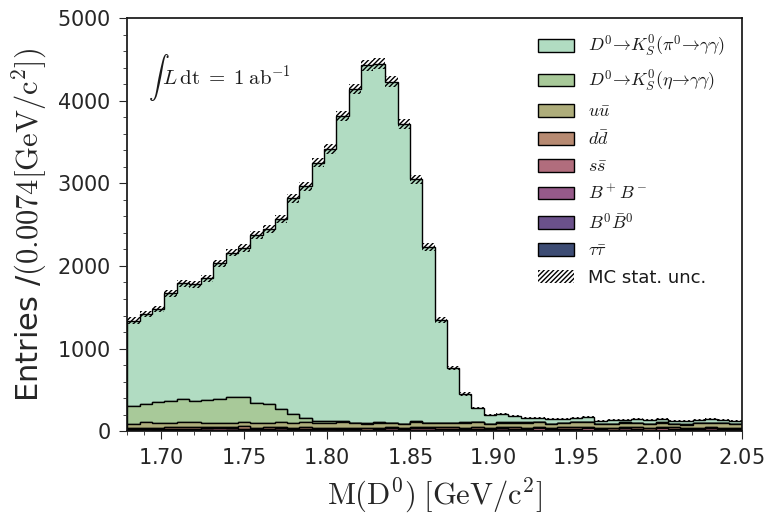

In [104]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$D^0 \to K_S^0 (\eta\to \gamma \gamma)$', r'$D^0 \to K_S^0 (\pi^0\to \gamma \gamma)$']
var = 'D0_M'
data  = [pd_taupair_topo[var], pd_mixed_topo[var], pd_charged_topo[var],pd_ssbar_topo[var], pd_ddbar_topo[var],pd_uubar_topo[var], pd_ccbar_Veta[var], pd_ccbar_Vpi0[var]]  
scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",ncol=1, luminosity="$1\; \mathrm{ab}^{-1}$")
plt.savefig('MC15ri_kshortg_D0_M_before.png')

In [105]:
cut = 'gamma_E>0.0'
cut = 'dM_pi0_75MeV  > 0.023'

# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001  '
pd_ccbar_Vpi0, pd_ccbar_Veta, pd_uubar_topo,pd_ddbar_topo,pd_ssbar_topo,pd_charged_topo, pd_mixed_topo, pd_taupair_topo = cut_dfs_generic_Vpi0eta(cut, pd_ccbar_Vpi0, pd_ccbar_Veta, pd_uubar_topo,pd_ddbar_topo,pd_ssbar_topo,pd_charged_topo, pd_mixed_topo, pd_taupair_topo)

[ 405.  438.  458.  532.  558.  579.  603.  676.  721.  784.  798.  861.
  885.  950. 1078. 1286. 1467. 1802. 2132. 2604. 2863. 2995. 2840. 2386.
 1847. 1080.  596.  311.  172.  111.  117.   84.   67.   73.   67.   56.
   73.   70.   59.   47.   59.   54.   46.   58.   45.   49.   50.   45.
   51.   39.]
fitst_bin_entries=405.0


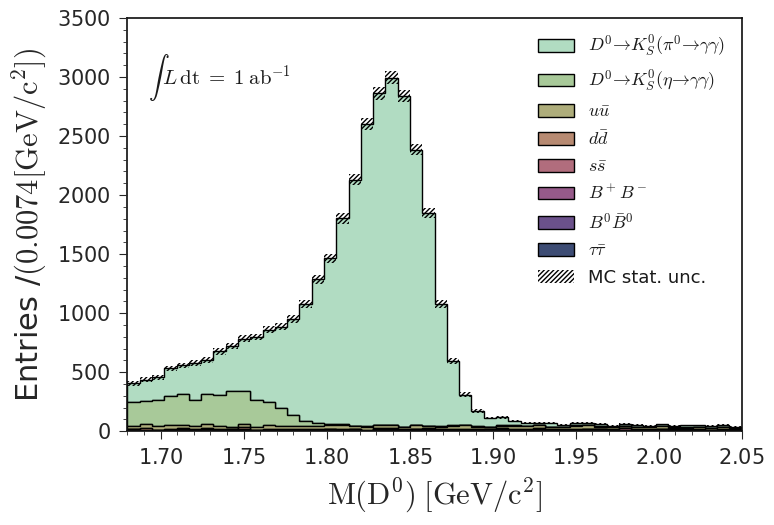

In [106]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$D^0 \to K_S^0 (\eta\to \gamma \gamma)$', r'$D^0 \to K_S^0 (\pi^0\to \gamma \gamma)$']
var = 'D0_M'
data  = [pd_taupair_topo[var], pd_mixed_topo[var], pd_charged_topo[var],pd_ssbar_topo[var], pd_ddbar_topo[var],pd_uubar_topo[var], pd_ccbar_Veta[var], pd_ccbar_Vpi0[var]]  
scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",ncol=1, luminosity="$1\; \mathrm{ab}^{-1}$")
plt.savefig('MC15ri_kshortg_D0_M_after.png')

In [ ]:
nSigCascDcyBr_0